## Bayesi szűrő kereslet-előrejelzésre

Legyen adott egy ismeretlen ("rejtett") állapot, ami a keresletet befolyásolja. Ezt közveltenül nem tudjuk megtapasztalni, csak magát a keresletet látjuk. A rejtett állapot evolúciója:

\begin{align}
\mathbf{l}_t &= \mathbf{F} \mathbf{l}_{t-1} + \mathbf{G}\varepsilon,\\
\varepsilon &\sim \mathcal{N} \left(\varepsilon | \mathbf{0}, \mathbf{I} \right),
\end{align}

ahol $\mathbf{l}_t$ a rejtett állapot a $t$. időpillanatban, $\mathbf{F}$ és $\mathbf{G}$ mátrixok. Azaz a $t$-beli állapot lineáris függvénye a $(t-1)$-belinek, plusz egy véletlen hatás. Itt vannak mindenféle analógiák a hagyományos Kálmán-szűrőkkel, de most nem írom le... egyszerűbb úgy gondolni rá, hogy hatékony számolás érdekében tesszük fel ezt a lineáris modellt.

Most átírjuk a fentit valószínűségi formára. Az átírás egy ismert tulajdonsága a Gauss-eloszlásnak, most nem bizonyítom, de a Gauss-folyamatos cuccomban le van írva. A $t$. pillanatbeli állapot eloszlása a $t-1$-belit feltéve tehát Gauss:

\begin{align}
p\left( \mathbf{l}_t | \mathbf{l}_{t-1} \right) = \mathcal{N}\left( \mathbf{l}_t | \mathbf{F} \mathbf{l}_{t-1}, \mathbf{G}\mathbf{G}^T  \right).
\end{align}

Végül jelölje $z_t$ a $t$. időpillanatban mért keresletet, amire

\begin{align}
p\left(z_t | \mathbf{l}_t \right) = \mathcal{P}\left(z_t | f(\mathbf{l}_t) \right) .
\end{align}

Itt annyit mondunk, hogy a mért kereslet a rejtett állapotból következik, és $\mathcal{P}$ (pl. Poisson) eloszlást követ. Az eloszlás paramétere valamilyen $f$ függvényből jön, a cikkben például:

\begin{align}
f(\mathbf{l}_t) = \mathbf{a}_t^T \mathbf{l}_t + \mathbf{w}^T\mathbf{x}_t,
\end{align}

ahol $\mathbf{a}_t$ és $\mathbf{w}$ paramétervektorok (amelyek akár tanulhatók is), $\mathbf{x}_t$ pedig a $t$. időpillanatban lévő bemenet, ha van ilyen (pl. hét napja, évszak, leárazások stb.). Általános esetben használhatunk $f$-nek egy deep hálót is. Vigyázni kell, mert a Poisson-eloszlás paramétere pozitív kell hogy legyen, ezért az előbbi köré célszerű még egy további függvényt is építeni, ami a pozitív valós számokra képez (a cikkben softplus-t használnak).

## Szűrés

Először megvizsgáljuk az ún. szűrést, amikor az eddig megfigyelt keresletek ismeretében szeretnénk meghatározni az aktuális rejtett állapot eloszlását. A Bayes-tételt és a teljes valószínűség tételét felhasználva, valamint a feltételes függetlenségeket kihasználva

\begin{align}
p\left(\mathbf{l}_{t} | z_{:t}\right) &\propto p\left(z_{t} | \mathbf{l}_{t}\right) p\left(\mathbf{l}_{t} | z_{:t-1}\right) \\
&= p\left(z_{t} | \mathbf{l}_{t}\right) \int p\left(\mathbf{l}_{t} | \mathbf{l}_{t-1}\right) p\left(\mathbf{l}_{t-1} | z_{:t-1}\right) d\mathbf{l}_{t-1},
\end{align}

ahol látjuk, hogy az integrálban szereplő utolsó tag megegyezik magával a keresett mennyiséggel, csak eggyel korábbi időlépésben. Innen már sejtjük, hogy rekurzív algoritmussal van dolgunk. Becsüljük $p\left(\mathbf{l}_{t} | z_{:t}\right)$-t egy Gauss-eloszlással, azaz legyen

\begin{align}
p\left(\mathbf{l}_{t} | z_{:t}\right) \approx  \mathcal{N}\left( \mathbf{l}_{t} | \mu_{t}, \Sigma_{t} \right),
\end{align}

és keressük a $\mu_t$, $\Sigma_t$ paramétereket. Tegyük fel, hogy a korábbi időindexekre ez már sikerült (teljes indukció):

\begin{align}
p\left(\mathbf{l}_0\right) &\approx \mathcal{N}\left( \mathbf{l}_0 | \mu_0, \Sigma_0 \right),\\
p\left(\mathbf{l}_{t-1} | z_{:t-1}\right) &\approx \mathcal{N}\left( \mathbf{l}_{t-1} | \mu_{t-1}, \Sigma_{t-1} \right).
\end{align}

Ekkor

\begin{align}
p\left(\mathbf{l}_{t} | z_{:t}\right) &\propto p\left(z_{t} | \mathbf{l}_{t}\right) \int p\left(\mathbf{l}_{t} | \mathbf{l}_{:t-1}\right) p\left(\mathbf{l}_{t-1} | z_{:t-1}\right) d\mathbf{l}_{t-1}\\
&= \mathcal{P}\left(z_t | f(\mathbf{l}_t) \right) \int \mathcal{N}\left( \mathbf{l}_t | \mathbf{F} \mathbf{l}_{t-1}, \mathbf{G}\mathbf{G}^T  \right) \mathcal{N}\left( \mathbf{l}_{t-1} | \mu_{t-1}, \Sigma_{t-1} \right) d\mathbf{l}_{t-1} \\
&= \mathcal{P}\left(z_t | f(\mathbf{l}_t) \right) \mathcal{N}\left(\mathbf{l}_t | \mathbf{F}\mu_{t-1}, \mathbf{G}\mathbf{G}^T + \mathbf{F}\Sigma_{t-1}\mathbf{F}^T \right),
\end{align}

ahol az utolsó lépésben ismét a Gauss-eloszlás egy tulajdonságát használtuk, amit szintén bizonyítottam a Gauss-folyamatos notebook-ban. Ebben már nincs olyasmi, amit ne tudnánk kiszámolni (főleg nem egy ronda integrál...). A Gauss-eloszlással való becsléshez használhatjuk a Laplace-approximációt. Legyen

\begin{align}
\ell(\mathbf{l}_t) &:= \ln p\left(z_{t} | \mathbf{l}_{t}\right) p\left(\mathbf{l}_{t} | z_{:t-1}\right)\\
&= \mathcal{P}\left(z_t | f(\mathbf{l}_t) \right) \mathcal{N}\left(\mathbf{l}_t | \mathbf{F}\mu_{t-1}, \mathbf{G}\mathbf{G}^T + \mathbf{F}\Sigma_{t-1}\mathbf{F}^T \right),
\end{align}

majd fejtsük ezt Taylor-sorba az $\mathbf{\hat l}_t$ maximum körül második rendig:

\begin{align}
\ell(\mathbf{l}_t) \approx \ell(\mathbf{\hat l}_t) + \frac{1}{2} \left(\mathbf{l}_t - \mathbf{\hat l}_t \right)^T \left( \nabla^2_{\mathbf{l}_t} \ell \right)\Big|_{\mathbf{l}_t = \mathbf{\hat l}_t} \left(\mathbf{l}_t - \mathbf{\hat l}_t \right),
\end{align}

ahol az elsőrendű tag $0$, mivel maximumban vagyunk. Így exponenciálist véve

\begin{align}
p\left(\mathbf{l}_{t} | z_{:t}\right) &\approx  \mathcal{N}\left( \mathbf{l}_{t} | \mu_{t}, \Sigma_{t} \right),\\
\mu_t &= \mathbf{\hat l_t},\\
\Sigma_t &= - \left(\nabla^2_{\mathbf{l}_t} \ell\right)^{-1}.
\end{align}

Ha már a $\nabla^2_{\mathbf{l}_t} \ell$ Hesse-mátrixot ígyis-úgyis ki kell számolnunk, a maximumkereséshez akár használhatjuk a Newton-Rapshon módszert. Ennek a többdimenziós verziója így néz ki:

\begin{align}
\mathbf{l}_t \gets \mathbf{l}_t - \left(\nabla^2_{\mathbf{l}_t} \ell \right)^{-1} \nabla_{\mathbf{l}_t} \ell ,
\end{align}

ahol a szokásos osztás helyett a Hesse-mátrix inverzével kell szorozni. Az implementációt nagyon megkönnyíti, ha a gradienst és a Hesse-mátrixot nem kézzel, hanem automatikus deriválással számoljuk ki. Ehhez az pl. az `autograd` csomagot lehet használni (vagy TensorFlow, PyTorch stb.).

## Paraméterek illesztése

Legyen adott a $t$-ig tartó $z_{:t}$ kereslet-sorozat. Kíváncsiak vagyunk $p(z_{:t})$ likelihoodra, amelyet maximalizálni szeretnénk a korábban említett tanulható paraméterek szerint, azaz maximum likelihood megoldást fogunk keresni. A teljes valószínűség tétele alapján

\begin{align}
p\left(z_{:t}\right) = p\left(z_t | z_{:t-1}\right) p\left(z_{t-1} | z_{:t-2}\right) \cdots p\left(z_{1} | z_0\right) p\left(z_0\right).
\end{align}

Erre fogunk rekurzív becslést adni. Tetszőleges tagra

\begin{align}
\ln p\left(z_{t} | z_{:t-1}\right) &= \ln \int p\left(z_{t} | \mathbf{l}_{t}\right) p\left(\mathbf{l}_{t} | z_{:t-1}\right) d\mathbf{l}_t \\
&\approx \ell(\mu_t) + \frac{D}{2}\ln(2\pi) - \frac{1}{2}\det \Sigma_t^{-1},
\end{align}

ahol felhasználtuk, hogy az integrálban szereplő mennyiséget már megbecsültük a szűrésnél, és az adódó Gauss-integrálra van analitikus megoldás. $D$ jelöli az $\mathbf{l}_t$ rejtett állapot dimenzionalitását. A $\ln p(z_{:t})$ log-likelihood becslése során tehát nincs más dolgunk, mint az megfigyelt keresletek idősorán végigfuttatni a szűrésnél leírt rekurziót, és menet közben összegezni a fenti egyenletből kapott mennyiségeket.

## Implementációs részletek

Itt egy elég alapszintű implementáció következik. A cikkben szereplő legegyszerűbb modellt fogjuk használni (`LevelISSM` + Poisson) egy toy adathalmazon. Minden pozitív értékű paraméter körül szerepel egy extra softplus. A Laplace-approximációhoz Newton-Raphson módszert használunk, a cikkben ennek egy továbbfejlesztett verziója ment (line search). A paraméterek illesztése CPU-n nem túl gyors, de ez most nem is volt szempont.

In [1]:
%matplotlib inline

import autograd.numpy as np
from autograd import grad, hessian
from autograd.misc.optimizers import rmsprop

from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# LevelISSM modell a cikkből

def softplus(x): return np.log1p(np.exp(-np.abs(x))) + np.maximum(x,0)

a = np.ones(1)
F = np.array([[1.]])

def generate_data(params,N):
    M     = len(params)-3
    w     = params[:M]
    μ,σ,α = params[M:]
    
    GGT = np.diag(np.array([softplus(α)]))
    
    x   = np.random.randn(N,M)
    l   = μ*np.ones(1)
    
    def f(l,x):
        return softplus(np.dot(a,l) + np.dot(x,w))
    
    z = []
    for t in range(N):
        z += [np.random.poisson(f(l,x[t]))]
        l  = np.random.multivariate_normal(F@l,GGT)
    return np.array(z),x

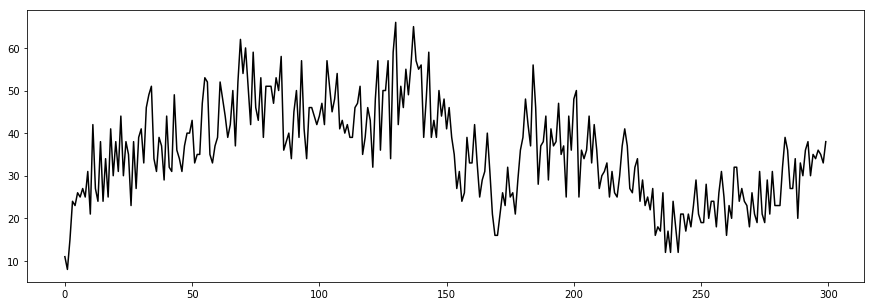

In [3]:
# Adatgenerálás adott paraméterekkel

w_  = np.random.randn(5)/10.
μ0_ = 10.
σ0_ = 1.
α_  = 5.
N   = 300

true_params = np.concatenate([w_,np.array([μ0_,σ0_,α_])])
num_train   = int(N*0.8)

z,x = generate_data(true_params,N)
plt.figure(figsize=(15,5))
plt.plot(z,c='black');

In [4]:
# Normalizálatlan log Gauss
def lnN(l,μ,Σ):
    d = l-μ
    return -0.5*np.dot(d,np.linalg.solve(Σ,d))

# Normalizálatlan log Poisson
def lnP(z,λ):
    return z*np.log(λ)-λ

# p(l_t | z_:t) becslése Laplace-approximációval (szűrés)
def filt(z,x,μ0,Σ0inv,f,GGT,max_iter=100):
    μ = F@μ0
    Σ = F@np.linalg.solve(Σ0inv,F.T) + GGT
    
    def ℒ(l):   return lnN(l,μ,Σ) + lnP(z,f(l,x))
    def dℒ(l):  return grad(ℒ)(l)
    def ddℒ(l): return hessian(ℒ)(l)
    
    l0 = np.array(μ,copy=True)
    d  = dℒ(l0)
    i  = 0
    while np.dot(d,d)>1e-12 and i<max_iter:
        l0 -= np.linalg.solve(ddℒ(l0),d)
        d   = dℒ(l0)
        i  += 1
    return l0,ddℒ(l0),ℒ(l0)

In [5]:
# A -log p(z_:t) negatív log-likelihood kiszámítása

def loss(params):
    M     = x.shape[1]
    w     = params[:M]
    μ,σ,α = params[M:]
    
    GGT   = np.diag(np.array([softplus(α)]))
    μ0    = μ*np.ones(1)
    Σ0inv = 1/softplus(σ)*np.eye(1)
    
    def f(l,x): return softplus(np.dot(a,l) + np.dot(x,w))
    
    lhood = 0.
    for t in range(num_train):
        μ0,Σ0inv,ℒ = filt(z[t],x[t],μ0,Σ0inv,f,GGT)
        lhood     += ℒ - 0.5*np.linalg.slogdet(Σ0inv)[1]
    return -lhood

In [6]:
loss(true_params),loss(np.concatenate([np.random.randn(5), np.array([z[0],1.,1.])]))

(-24307.43419081326, -23842.993875275963)

In [7]:
# Paraméterek illesztése maximum likelihood alapon

params = np.concatenate([np.random.randn(5), np.array([z[0],1.,1.])])
num_iters = 50
with tqdm(total=num_iters) as pbar:
    def callback(params,it,g):
        pbar.update(1)
        pbar.set_description("Loss: {:.3f}".format(loss(params)))
    opt = rmsprop(grad(lambda p,i: loss(p)),params,step_size=0.1,num_iters=num_iters,callback=callback)

Loss: -24327.646: 100%|██████████| 50/50 [04:17<00:00,  5.15s/it]


In [8]:
print("Params: w={}, μ0={:.3f}, σ0={:.3f}, α={:.3f}".format(np.round(w_,3),μ0_,σ0_,α_))
print("Fitted: w={}, μ0={:.3f}, σ0={:.3f}, α={:.3f}".format(np.round(opt[:5],3),*opt[5:]))

Params: w=[ 0.148  0.033 -0.103  0.022 -0.06 ], μ0=10.000, σ0=1.000, α=5.000
Fitted: w=[-1.085  0.425 -0.432 -0.499 -0.602], μ0=15.138, σ0=5.256, α=5.260


In [9]:
# A Poisson-eloszlás paraméterének plottolása (rejtett "valóság" a zajos adatok mögött)

def get_fit(params):
    M     = x.shape[1]
    w     = params[:M]
    μ,σ,α = params[M:]
    
    GGT = np.diag(np.array([softplus(α)]))
    μ0  = μ*np.ones(1)
    Σ0  = softplus(σ)*np.eye(1)
    
    def f(l,x): return softplus(np.dot(a,l) + np.dot(x,w))

    fitted  = []
    for t in range(num_train):
        μ0,Σ0,_  = filt(z[t],x[t],μ0,Σ0,f,GGT)
        fitted  += [f(μ0,x[t])]
    return np.array(fitted).squeeze()

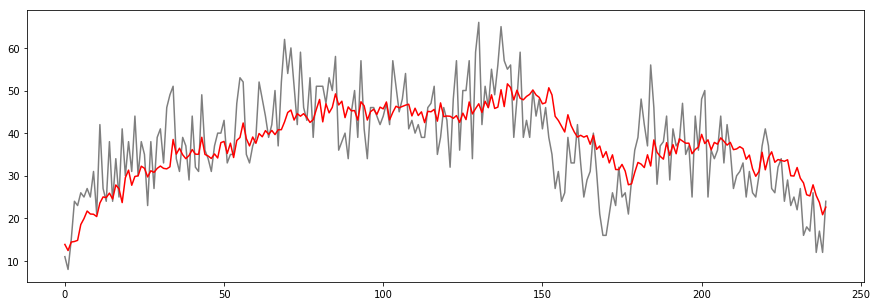

In [10]:
# Plot

fitted = get_fit(opt)

plt.figure(figsize=(15,5))
plt.plot(z[:num_train],c='black',alpha=.5)
plt.plot(fitted,c='red');

In [11]:
# Keresleti trajektóriák mintavételezése az illesztett modellből

def sample_trajectories(params,num_samples=1):
    M     = x.shape[1]
    w     = params[:M]
    μ,σ,α = params[M:]
    
    GGT = np.diag(np.array([softplus(α)]))    
    def f(l,x): return softplus(np.dot(a,l) + np.dot(x,w))

    smps = []
    for n in range(num_samples):
        μ0    = μ*np.ones(1)
        Σ0inv = 1/softplus(σ)*np.eye(1)
        smp   = []
        for t in range(num_train):
            μ0,Σ0inv,_ = filt(z[t],x[t],μ0,Σ0inv,f,GGT)
            l          = np.random.multivariate_normal(μ0,np.linalg.inv(Σ0inv)) # fixme
            smp       += [np.random.poisson(f(l,x[t]))]
        
        for t in range(num_train,len(z)):
            l     = np.random.multivariate_normal(F@l,GGT)
            smp  += [np.random.poisson(f(l,x[t]))]
        smps += [smp]
    return np.array(smps)

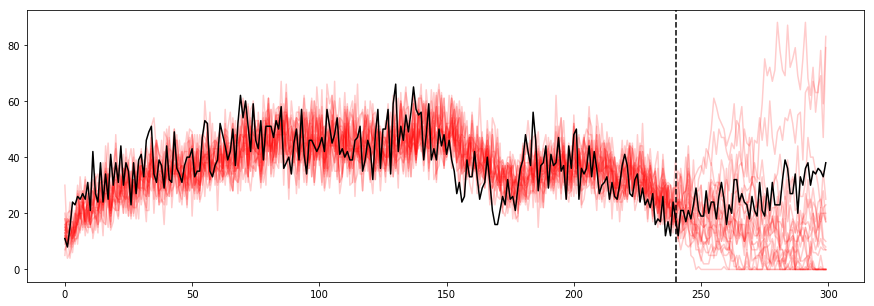

In [13]:
# Trajektóriák ábrázolása

smps = sample_trajectories(opt,20)

plt.figure(figsize=(15,5))
for s in smps:
    plt.plot(s,alpha=0.2,c='red') # sample
plt.plot(z,c='black')
plt.axvline(num_train,ls='--',color='black');